In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

In [2]:
# Load train, test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [4]:
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [5]:
train.shape, test.shape

((39116, 16), (9779, 15))

<Axes: xlabel='price', ylabel='Count'>

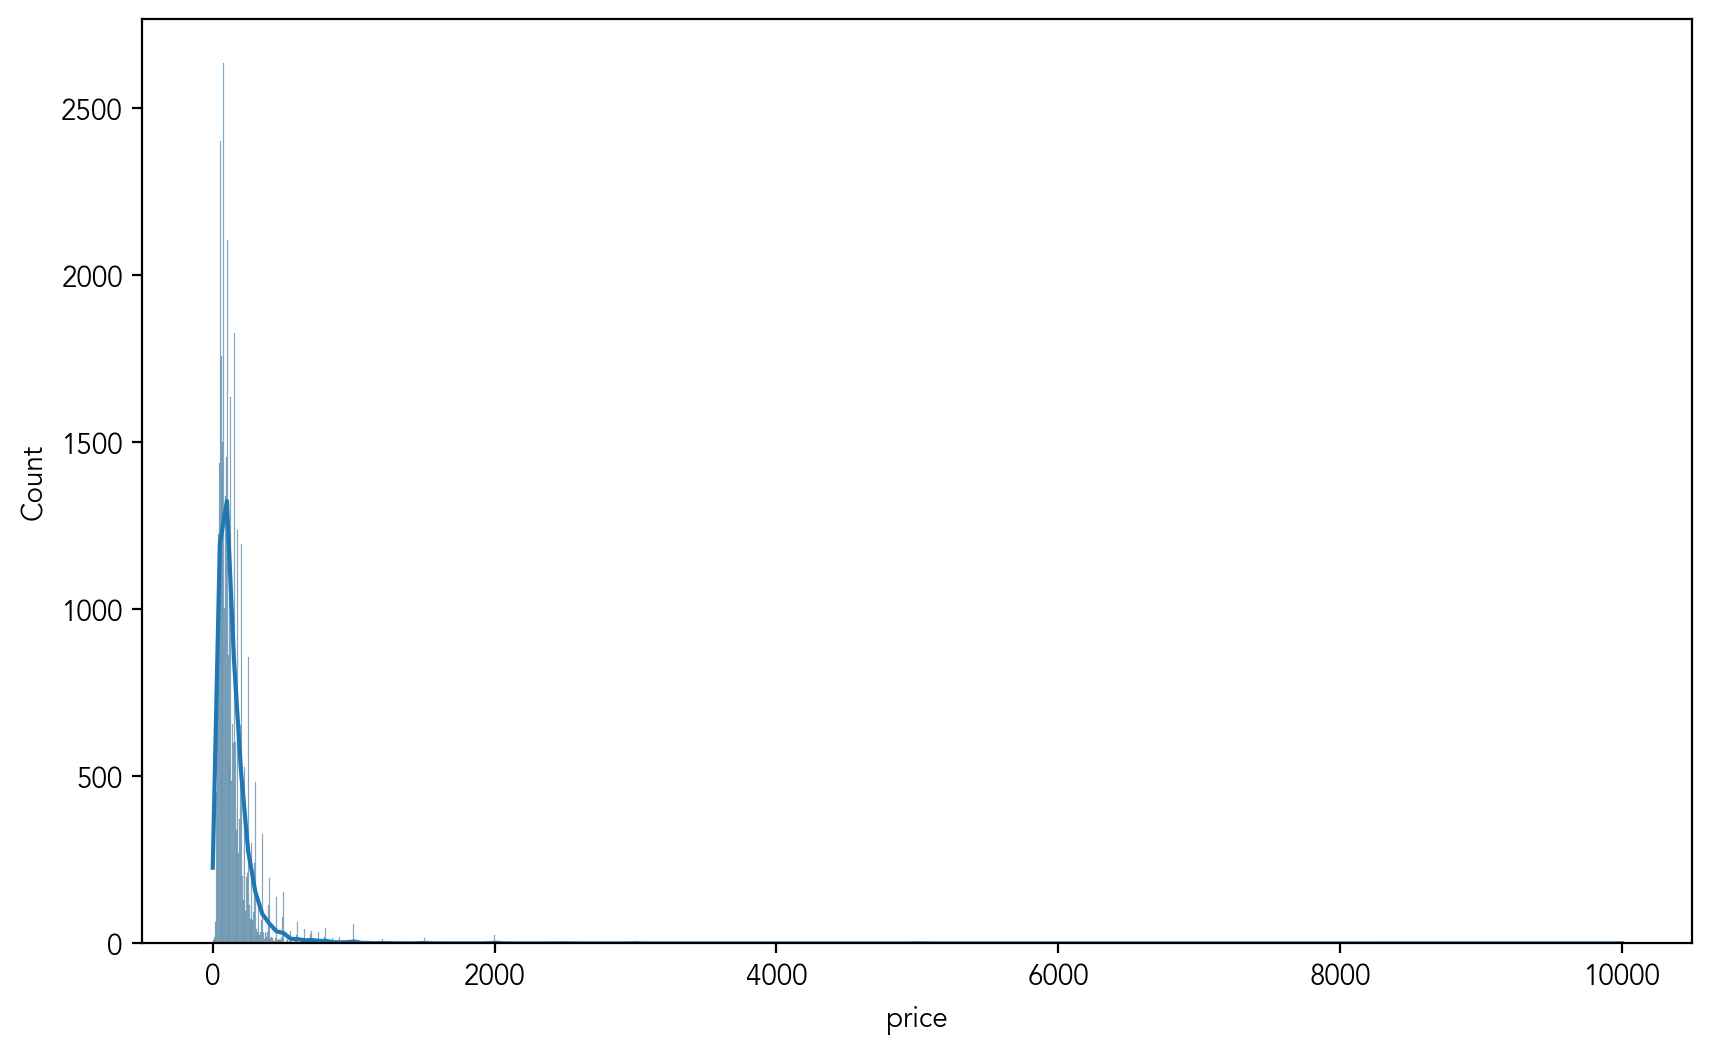

In [10]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(train['price'], kde=True)

<Axes: ylabel='price'>

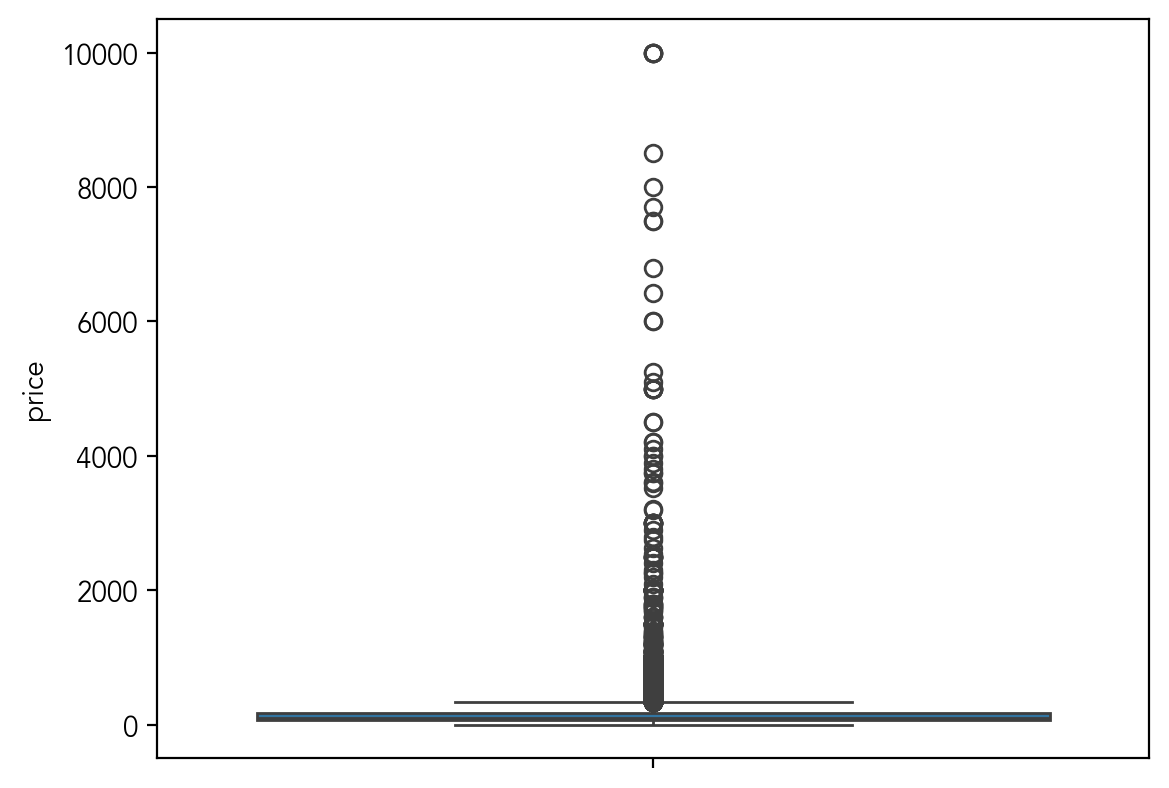

In [9]:
sns.boxplot(y='price', data=train)

In [11]:
# Drop 'last_review' from train and test datasets
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)


In [12]:
train.shape, test.shape

((39116, 15), (9779, 14))

In [13]:
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [14]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [15]:
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [16]:
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
target = train['price']
train = train.drop('price', axis = 1)

In [18]:
target.head()

0     70
1    240
2    150
3     85
4     44
Name: price, dtype: int64

In [19]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,0.00,1,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               39116 non-null  float64
 12  calculated_host_listings_count  

In [21]:
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']

train = train[cols]
test = test[cols]


# 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude',

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

In [25]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_val)
mean_squared_error(y_val, pred_rf)

72593.499264545

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
        }

model_rf = RandomForestRegressor()
grid = GridSearchCV(model_rf, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_


In [33]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    max_depth = None,
    max_features = 'sqrt',
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 200
)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_val)
mean_squared_error(y_val, pred_rf)

67599.70893447223

In [26]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_val)
mean_squared_error(y_val, pred_xgb)


77045.8495853422

In [36]:
from sklearn.model_selection import GridSearchCV

params={
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.5, 0.7, 1],
        'gamma': [0, 0.1, 0.2]
        }

model_xgb = XGBRegressor()
grid = GridSearchCV(model_xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_


/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 500}

In [37]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    colsample_bytree = 0.7,
    gamma = 0,
    learning_rate = 0.01,
    max_depth = 7,
    n_estimators = 500
)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_val)
mean_squared_error(y_val, pred_xgb)


# learning_rate = 0.07, max_depth = 5, n_estimators = 200, subsample = 0.9

68663.19172090657